![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 15 - Variational Auto-encoder </center>
### <center> CelebA </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/15_VAE/CelebA/MainCelebA.ipynb)

In [1]:
#-- Wide screen :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import torch

For Colab users:

In [4]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/15_VAE/CelebA/DeepLearningFramework ./CelebA

In [5]:
from Dataset import GetData, SetRange
from Model   import VAE

In [6]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda', index=0)

#### CelebA data:

In [7]:
dirPath             = r'C:\Users\oryai\Workarea\Data\CelebA\img_align_celeba\\'
oTrainSet, oTestSet = GetData(dirPath)

#### VAE model:

In [8]:
oVAE = VAE().to(DEVICE)
D    = oVAE.D
oVAE.load_state_dict(torch.load('./CelebA_VAE.pt'))
oVAE.eval()

oEncoder = oVAE.oEncoder
oDecoder = oVAE.oDecoder

#### Test reconstruction:

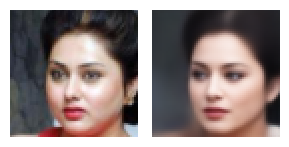

In [9]:
idx   = np.random.randint(len(oTestSet))
mX, _ = oTestSet[idx]

with torch.no_grad():
    mHatX = oVAE(mX[None,...].to(DEVICE))[0][0].cpu()
    
mX    = SetRange(mX,    bForward=False)
mHatX = SetRange(mHatX, bForward=False)

_, axs = plt.subplots(1, 2, figsize=(3, 3))
axs[0].matshow  (mX   .permute(1,2,0))
axs[1].matshow  (mHatX.permute(1,2,0))
axs[0].axis     ('off')
axs[1].axis     ('off')
plt.tight_layout()
plt.show        ()

#### Encode the test data:

In [10]:
from torch.utils.data import DataLoader

K       = 1024
oTestDL = DataLoader(oTestSet, batch_size=K)
mX, _   = next(iter(oTestDL))

with torch.no_grad():
    mZ = oEncoder(mX.to(DEVICE))[0].cpu()
    
mZ.shape

torch.Size([1024, 128])

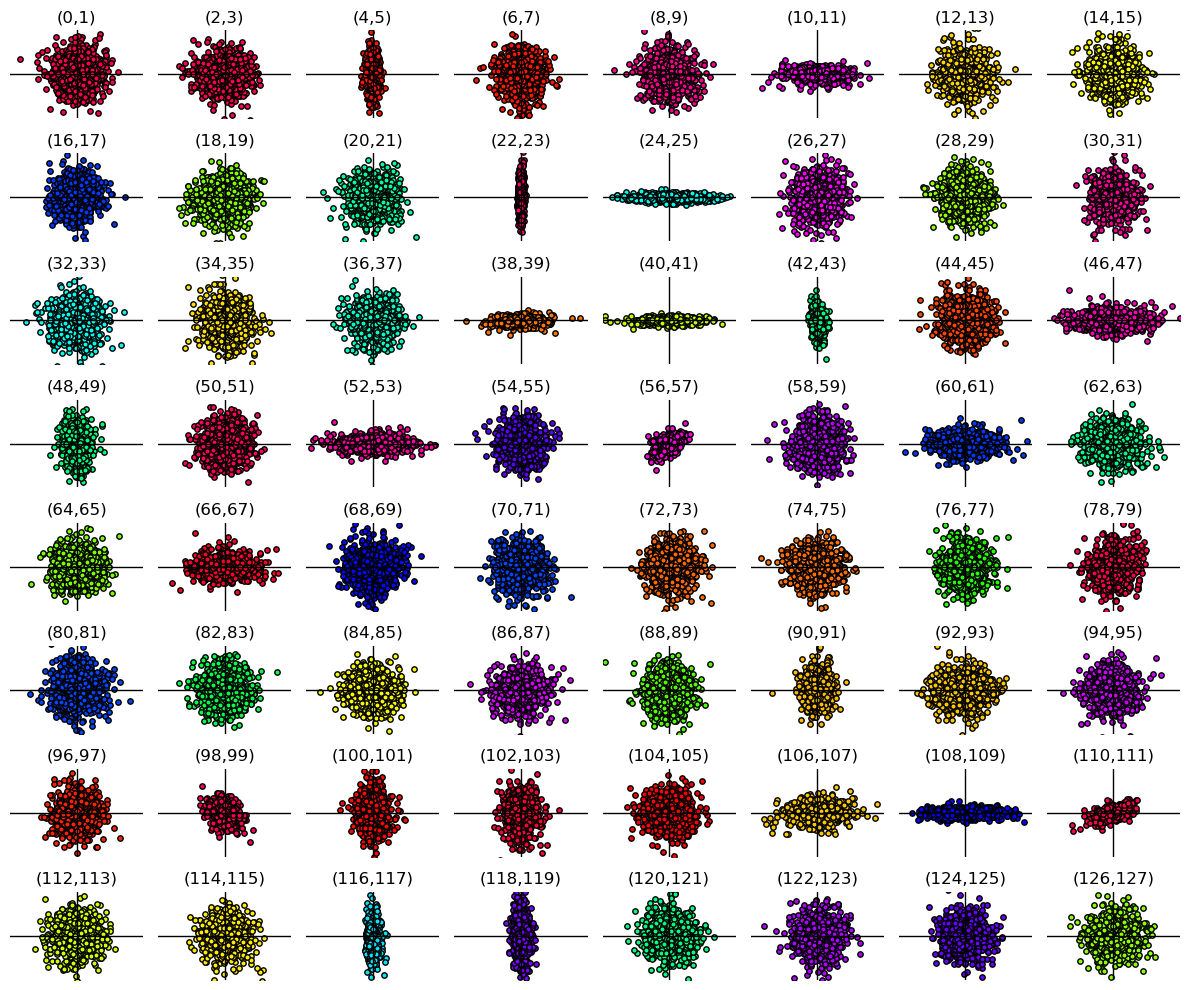

In [11]:
import matplotlib

def PlotScatter(mZ, c, sTitle, ax):
    ax.scatter  (mZ[:,0], mZ[:,1],  s=15, color=c, edgecolor='k')
    ax.set_title(sTitle)
    ax.axis     ('equal')
    ax.axis     ([-3.5, 3.5, -3.5, 3.5])
    ax.axvline  (c='k', lw=1)
    ax.axhline  (c='k', lw=1)
    ax.axis     (False)

cmap = matplotlib.cm.get_cmap('hsv')
_, ax = plt.subplots(8, 8, figsize=(12, 10))
for ii in range(8):
    for jj in range(8):
        idx   = 2 * (8*ii + jj)
        color = cmap(np.random.rand())
        PlotScatter(mZ[:,idx:idx+2], color, f'({idx},{idx+1})', ax[ii,jj])
        
plt.tight_layout()
plt.show        ()

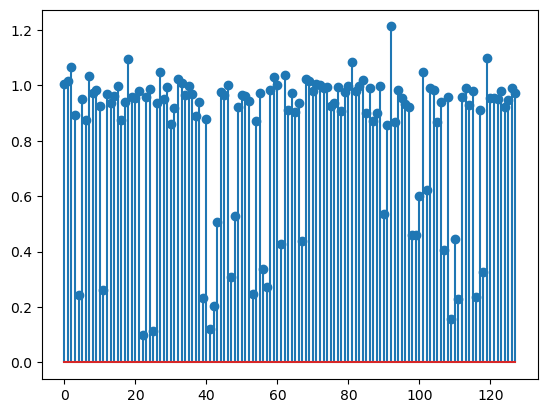

In [12]:
plt.stem(mZ.std(0)[:])
plt.show()

### Generate new samples:

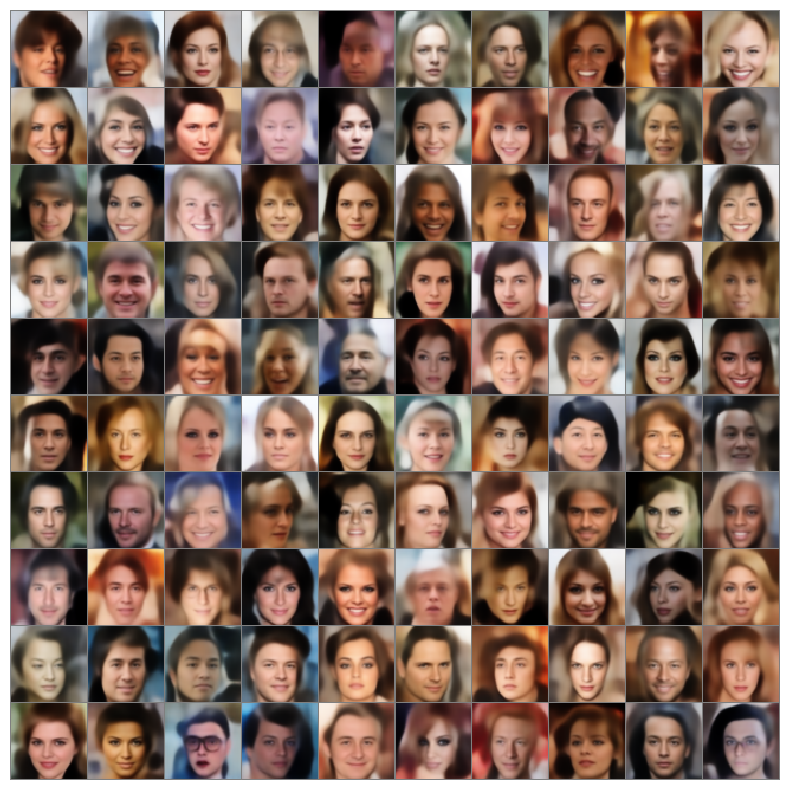

In [13]:
import torchvision

mZ = torch.randn(10**2, D)
with torch.no_grad():
    mNewX = oDecoder(mZ.to(DEVICE)).cpu()
    mNewX = SetRange(mNewX, bForward=False)

mG = torchvision.utils.make_grid(mNewX, nrow=10, pad_value=.5, padding=1)
mG = mG.permute(1,2,0)

_, ax = plt.subplots(figsize=(10, 10))
ax.matshow(mG)
ax.axis   ('off')
plt.show  ()

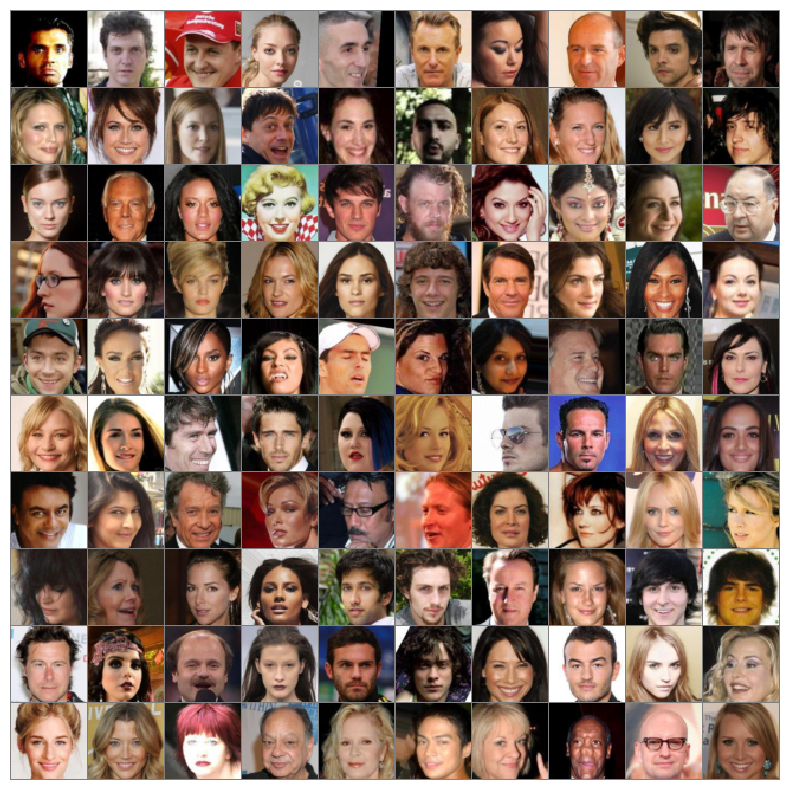

In [14]:
mX, _ = next(iter(oTestDL))
mX    = SetRange(mX, bForward=False)

mG = torchvision.utils.make_grid(mX[:100], nrow=10, pad_value=.5, padding=1)
mG = mG.permute(1,2,0)

_, ax = plt.subplots(figsize=(10, 10))
ax.matshow(mG)
ax.axis   ('off')
plt.show  ()

### Exercise: Interpolate between images
Interpolate between two images in the embedding space.

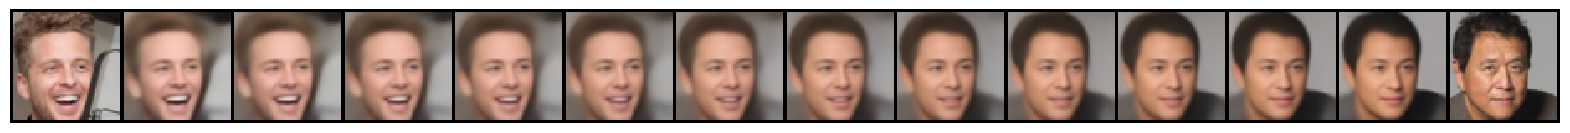

In [20]:
nTest      = len(oTestSet)
idx1, idx2 = np.random.randint(0, nTest, (2,))

mX1, _     = oTrainSet[idx1]
mX2, _     = oTrainSet[idx2]

with torch.no_grad():
    ???
    
K  = 12
v  = torch.linspace(0, 1, K, device=DEVICE)[:,None]
mZ = ???
with torch.no_grad():
    ???
        
mX = torch.cat([mX1[None,...], mX, mX2[None,...]], dim=0)
mX = SetRange(mX, bForward=False)

mG = torchvision.utils.make_grid(???, nrow=K+2)
mG = mG.permute(1,2,0)

_, ax = plt.subplots(figsize=(20, 3))
ax.matshow(mG)
ax.axis   ('off')
plt.show  ()

In [ ]:
# nTest      = len(oTestSet)
# idx1, idx2 = np.random.randint(0, nTest, (2,))

# mX1, _     = oTrainSet[idx1]
# mX2, _     = oTrainSet[idx2]

# with torch.no_grad():
#     vZ1 = oEncoder(mX1[None,...].to(DEVICE))[0]
#     vZ2 = oEncoder(mX2[None,...].to(DEVICE))[0]
    
# K  = 12
# v  = torch.linspace(0, 1, K, device=DEVICE)[:,None]
# mZ = v * vZ2 + (1 - v) * vZ1
# with torch.no_grad():
#     mX = oDecoder(mZ).cpu()
        
# mX = torch.cat([mX1[None,...], mX, mX2[None,...]], dim=0)
# mX = SetRange(mX, bForward=False)

# mG = torchvision.utils.make_grid(mX, nrow=K+2)
# mG = mG.permute(1,2,0)

# _, ax = plt.subplots(figsize=(20, 3))
# ax.matshow(mG)
# ax.axis   ('off')
# plt.show  ()